# Analysis in indicators of heavy traffic on I-94
The goal of our analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. For instance, we may find out that the traffic is usually heavier in the summer or when it snows.

In [1]:
import pandas as pd
i_94 = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

i_94.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [2]:
i_94.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [3]:
i_94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [8]:
i_94.isnull().sum()

holiday                0
temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
date_time              0
traffic_volume         0
dtype: int64

## Analyzing Traffic Volume

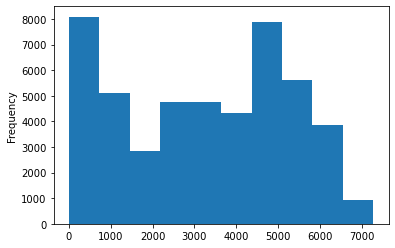

In [4]:
import matplotlib.pyplot as plt
i_94["traffic_volume"].plot.hist()
plt.show()

In [5]:
i_94["traffic_volume"].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

We can see that the average hourly traffic volume is 3260 cars and there are only 1193 cars or fewer traffic volume in around 25% of the time. However, about 25% of the time, the traffic volume was4,933 cars or more.

It shows that we need to compare daytime and nighttime data. 

## Traffic Volume: Day vs. Night

In [6]:
i_94["date_time"] = pd.to_datetime(i_94["date_time"])

day = i_94.copy()[(i_94["date_time"].dt.hour >= 7) & (i_94["date_time"].dt.hour < 19)]
print(day.shape)

night = i_94.copy()[(i_94["date_time"].dt.hour >= 19) | (i_94["date_time"].dt.hour < 7)]
print(night.shape)

(23877, 9)
(24327, 9)


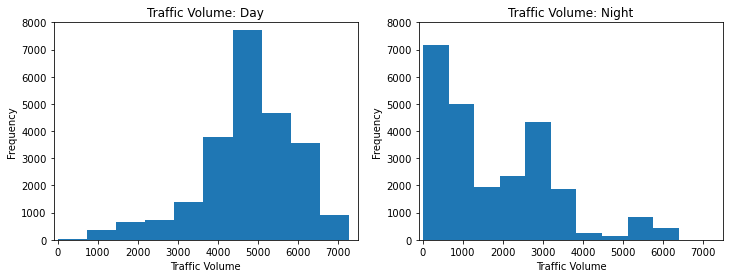

In [13]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(day["traffic_volume"])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Traffic Volume: Day')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.subplot(1, 2, 2)
plt.hist(night["traffic_volume"])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Traffic Volume: Night')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.show()

In [14]:
day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [15]:
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

The histogram shows the distribution of traffic volume during the day is left skewed. This means that most of the traffic volume values are high. We can see that there are 4252 or more cars passing the station each hour 75% of the time. 

On the other hand, the histogram displaying the nighttime data is right skewed, which means most of the traffic volume values are low — 75% of the time, the number of cars that passed the station each hour was less than 2,819.

Since the traffic at night is generally light, we will focus on the daytime data to find indicators of heavy traffic.

## Time Indicators

Time can be a good indicator because people move a lot at a certain time of day, on a certain day, or in a certain month.

- ### Month

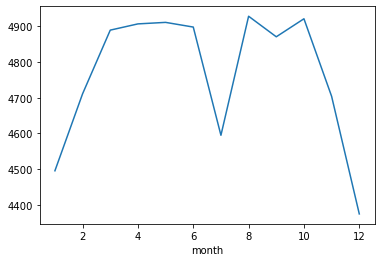

In [16]:
day["month"] = day["date_time"].dt.month
by_month = day.groupby("month").mean()
by_month["traffic_volume"].plot.line()
plt.show()

The traffic looks less heavy during cold months (November–February) and more intense during warm months (March–October), with one interesting exception: July. To figure out whether there is something special about July, let's see how the traffic volume changed each year in July.

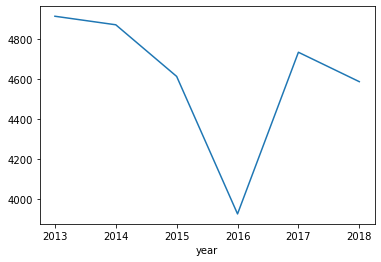

In [18]:
day["year"] = day["date_time"].dt.year
only_july = day[day["month"] == 7]
only_july.groupby("year").mean()["traffic_volume"].plot.line()
plt.show()

Typically, the traffic is pretty heavy in July, similar to the other warm months. The only exception we see is 2016, which had a high decrease in traffic volume. One possible reason for this is road construction.

As a tentative conclusion here, we can say that warm months generally show heavier traffic compared to cold months. In a warm month, you can expect for each hour of daytime a traffic volume close to 5,000 cars.

- ### Day of week

Let's now look at a more granular indicator: day number.

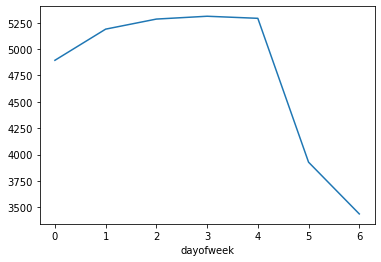

In [20]:
day["dayofweek"] = day["date_time"].dt.dayofweek
by_dayofweek = day.groupby("dayofweek").mean()
by_dayofweek["traffic_volume"].plot.line()
plt.show()

Traffic volume is significantly heavier on business days (Monday – Friday).

- ### Time of the day

Let's now see what values we have based on time of the day. The weekends, however, will drag down the average values, so we're going to look only at the averages separately.

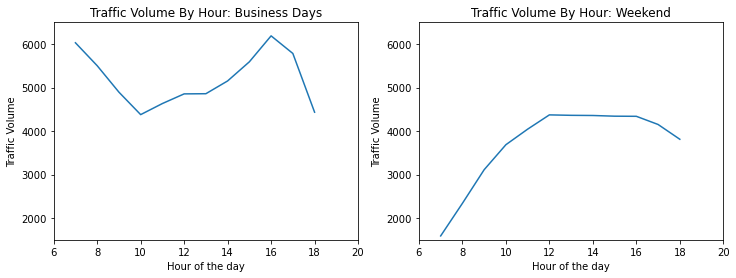

In [25]:
day["hour"] = day["date_time"].dt.hour
business_days = day[day["dayofweek"] <= 4]
weekend = day[day["dayofweek"] > 4]
by_hour_business = business_days.groupby("hour").mean()
by_hour_weekend = weekend.groupby("hour").mean()

plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
by_hour_business["traffic_volume"].plot.line()
plt.xlim(6, 20)
plt.ylim(1500, 6500)
plt.xlabel("Hour of the day")
plt.ylabel("Traffic Volume")
plt.title("Traffic Volume By Hour: Business Days")



plt.subplot(1, 2, 2)
by_hour_weekend["traffic_volume"].plot.line()
plt.xlim(6, 20)
plt.ylim(1500, 6500)
plt.xlabel("Hour of the day")
plt.ylabel("Traffic Volume")
plt.title("Traffic Volume By Hour: Weekend")

plt.show()

At each hour of the day, the traffic volume is generally higher during business days compared to the weekends. As somehow expected, the rush hours are around 7 and 16 — when most people travel from home to work and back. We see volumes of over 6,000 cars at rush hours.

To summarize, we found a few time-related indicators of heavy traffic:

- The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
- The traffic is usually heavier on business days compared to weekends.
- On business days, the rush hours are around 7 and 16.

## Weather Indicators

The dataset provides us with a few useful columns about weather: temp, rain_1h, snow_1h, clouds_all, weather_main, weather_description.

A few of these columns are numerical, so let's start by looking up their correlation values with traffic_volume.

In [26]:
day.corr()["traffic_volume"]

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
year             -0.003557
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

We can see that temperature has the strongest correlation with the traffic. The rest of weather indicators don't have significant correlation. 

Let's generate a scatter plot to visualize the correlation between temp and traffic_volume.

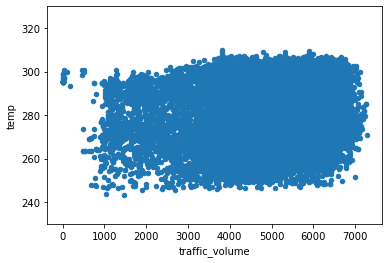

In [28]:
day.plot.scatter('traffic_volume', 'temp')
plt.ylim(230,330)
plt.show()

We can conclude that temperature doesn't look like a solid indicator of heavy traffic.

Let's now look at the other weather-related columns: weather_main and weather_description.

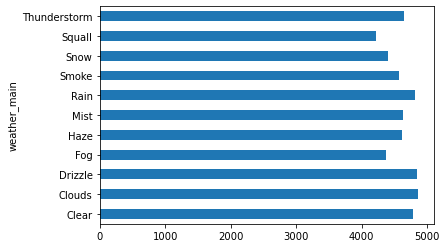

In [29]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_main["traffic_volume"].plot.barh()
plt.show()

It looks like there's no weather type where traffic volume exceeds 5,000 cars. This makes finding a heavy traffic indicator more difficult. Let's also group by weather_description, which has a more granular weather classification.

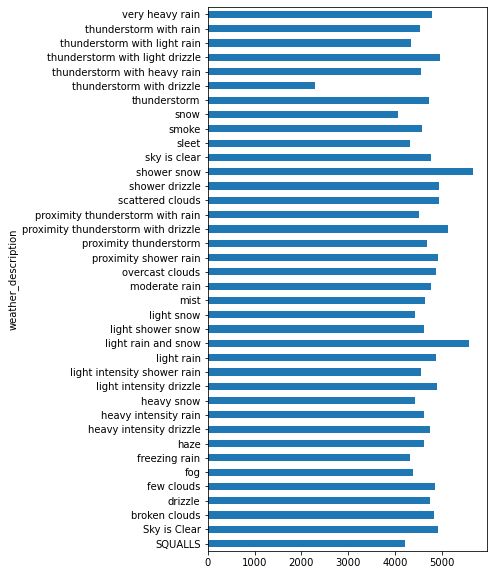

In [31]:
by_weather_description = day.groupby('weather_description').mean()
by_weather_description["traffic_volume"].plot.barh(figsize=(5,10))
plt.show()

It looks like there are three weather types where traffic volume exceeds 5,000:

- Shower snow
- Light rain and snow
- Proximity thunderstorm with drizzle

## Conclusion

In this project, we tried to find a few indicators of heavy traffic on the I-94 Interstate highway. We managed to find two types of indicators:

- Time indicators
  - The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
  - The traffic is usually heavier on business days compared to the weekends.
  - On business days, the rush hours are around 7 and 16.

- Weather indicators
  - Shower snow
  - Light rain and snow
  - Proximity thunderstorm with drizzle